# "Manual" Neural Networks

Recall that we need a hypothesis function (i.e. a choice of architecture) $h\colon \mathbb{R}^d \to \mathbb{R}^K$ to map inputs to outputs. Initially, we used a linear hypothesis class $h_\Theta(\mathbf{x}) = \Theta^\top \mathbf{x}$ where $\Theta \in \mathbb{R}^{d \times K}.$ This forms $K$ linear functions of the input and predicts the class with the largest value. This turns out to be equivalent to partitioning the input space into $K$ linear convex regions corresponding to each class. 

<center><img src="img/03-1.png" width=300></center>

**Remark.** To see this in $\mathbb{R}^2$ with $3$ classes, we have $2$ inequality constraints $\theta_1^\top \mathbf{x} \geq \theta_2^\top \mathbf{x}$ and $\theta_1^\top \mathbf{x} \geq \theta_3^\top \mathbf{x}.$ This resuts in a  convex polyhedron which is the intersection of two linear half-spaces. Similarly, for the other two. It can be shown that the interior of these subsets are disjoint and the union of the three cover all of $\mathbb{R}^2.$

**Q.** What about data that are not linearly separable? We want some way to separate these points via a nonlinear set of class boundaries.

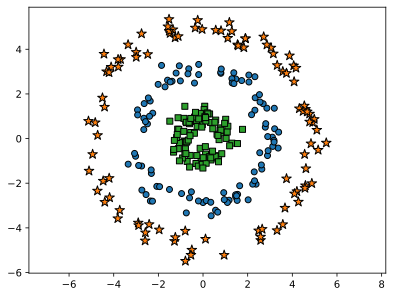

In [1]:
%config InlineBackend.figure_formats = ["svg"] 
import math
import numpy as np
import matplotlib.pyplot as plt

N = 100
r_eps = 0.3

def circle_data(radius: float, r_eps=r_eps, num_points=N):
    r0 = radius
    t = 2 * math.pi * np.random.random(N)
    r = r0 + r_eps * np.random.randn(N)
    x, y = r * np.cos(t), r * np.sin(t)
    return x, y

x0, y0 = circle_data(3)
x1, y1 = circle_data(5)
x2, y2 = circle_data(1)
plt.scatter(x0, y0, edgecolor="k")
plt.scatter(x1, y1, marker="*", edgecolor="k", s=100)
plt.scatter(x2, y2, marker="s", edgecolor="k")
plt.axis("equal");

## Nonlinear features

**One idea:** Apply a linear classifier to
some (potentially higher-dimensional) *features* of the data:

$$h_\Theta(\mathbf{x}) = \Theta^\top \phi(\mathbf{x})$$ 

where $\Theta \in \mathbb{R}^{n \times K}$ and $\phi\colon \mathbb{R}^d \to \mathbb{R}^n$ is a **feature transformation**. 

**Example.** For the above dataset, we can define $\phi(x, y) = (x, y, x^2 + y^2)$ (i.e. $r^2$) which makes the dataset separable in $\mathbb{R}^3$:

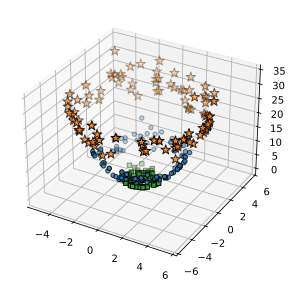

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x0, y0, x0 ** 2 + y0 ** 2, edgecolor="k")
ax.scatter(x1, y1, x1 ** 2 + y1 ** 2, marker="*", edgecolor="k", s=100)
ax.scatter(x2, y2, x2 ** 2 + y2 ** 2, marker="s", edgecolor="k");

**Q.** How do we create the features? 

1. Manual feature engineering (see above).
2. In a way that $\phi$ itself is **learned** from data (i.e. $\phi$ parametric).

Note that $\phi$ linear doesn't work since we just get a linear classifier. If $\phi(\mathbf{x}) = \Phi^\top \mathbf{x}$ where $\Phi \in \mathbb{R}^{d \times n}$, then 

$$
\begin{aligned}
h_\Theta(\mathbf{x}) 
&= \Theta^\top \phi(\mathbf{x}) \\
&= \Theta^\top \Phi^\top \mathbf{x} = (\Phi \Theta)^\top \mathbf{x}
\end{aligned}
$$

Thus, $\phi$ must be nonlinear. It turns out that applying a nonlinear univariate function $\sigma\colon \mathbb{R} \to \mathbb{R}$ suffices. Hence, we set 

$$\phi(\mathbf{x}) = \sigma(\Phi^\top \mathbf{x}).$$

The function $\sigma\colon \mathbb{R} \to \mathbb{R}$ is called an **activation function.** For example, with $\sigma = \cos$ we get what is called [random Fourier features](https://gregorygundersen.com/blog/2019/12/23/random-fourier-features/) which work great for many problems. Moreover, observe that we can feature transform features, i.e. compose feature transformations.

## Neural networks

A **neural network** refers to a particular type of hypothesis class, consisting of *multiple*, *parameterized* differentiable functions (a.k.a. "**layers**") composed together in any manner to form the output. Since neural networks involve composing a lot of functions (sometimes hundreds), it is usually referred to as **deep neural networks**, although there is really no requirement on depth beyond being not linear.

**Remark.** The term stems from biological inspiration, but at this point, literally any hypothesis function of the type above is referred to as a neural network. 



### Two-layer neural network

The simplest form of neural network is basically just the nonlinear features presented earlier:

$$
\begin{aligned}
h_\Theta(\mathbf{X}) = \sigma ( \mathbf{X} \mathbf{W_1}) \mathbf{W}_2 
\end{aligned}
$$

where $\Theta = \{ \mathbf{W}_1 \in \mathbb{R}^{d \times n}, \mathbf{W}_2 \in \mathbb{R}^{n \times K} \}$ are the trainable parameters and $\sigma\colon \mathbb{R} \to \mathbb{R}$ is the activation function that is applied elementwise to each vector. A commonly used one is **ReLU** defined as $\sigma(z) = \max(0, z).$

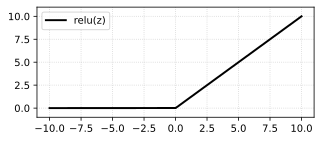

In [3]:
z = np.linspace(-10, 10, 1000)
plt.figure(figsize=(5, 2))
plt.plot(z, np.clip(z, a_min=0, a_max=None), label="relu(z)", linewidth=2, color="k")
plt.grid(alpha=0.6, linestyle="dotted"); plt.ylim(-1, 11); plt.legend();

### Fully-connected deep networks

Observe that for the 2-layer network, we have $|\Theta| = 2.$ A more generic form is the $L$-layer neural network, sometimes called a [multi-layer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) (MLP), **feedforward network** (FFN), or **fully-connected network** (FC) written in batch form as:

$$
h_\Theta(\mathbf{X}) = \sigma(\sigma(\ldots \sigma(\mathbf{X}\mathbf{W}_1)\mathbf{W}_2 \ldots) \mathbf{W}_{L-1}) \mathbf{W}_L
$$

or

$$
\begin{aligned}
\mathbf{Z}_1 &= \mathbf{X} \\
\mathbf{Z}_{i + 1} &= \sigma_i (\mathbf{Z}_i \mathbf{W}_i), \quad \forall i = 1, \ldots, L \\
h_\Theta(\mathbf{X}) &= \mathbf{Z}_{L + 1}
\end{aligned}
$$

where $\mathbf{Z}_i \in \mathbb{R}^{M \times n_i}$ and $\mathbf{W}_i \in \mathbb{R}^{n_i \times n_{i+1}}$, such that $n_1 = d$ and $n_{L+1} = K$ and with nonlinearities $\sigma_i\colon \mathbb{R} \to \mathbb{R}$ applied elementwise, and weights $\Theta = \{ \mathbf{W}_1, \ldots, \mathbf{W}_L \}.$ It follows that $|\Theta| = L.$ Also, we typically set $\sigma_L = \text{Id}$ for the **output layer**.

**Remark.** Again a bias term can be added. But in theoretical analysis we can just think there is an extra column containing +1 to simplify the computation. Example shapes for a 3-layer neural network:

```
i   n[i]  n[i+1]
----------------
1    16    32
2    32    64
3    64    10
4    10
```

## Backpropagation

Recall that to train the linear function via softmax regression and SGD, we had to calculate the gradients across cross-entropy and the matrix product. For a deep neural network, we need to calculate the gradient for each $\mathbf{W}_i \in \Theta,$ i.e. across each layer $i = 1, 2, \ldots, L.$ Since the gradients are calculated from the loss to the inputs, this part of the computation is called **backward pass**. The algorithm for caching intermediate results and accumulating the gradients is collectively called **backpropagation** (BP) or simply "backprop".

The best way to understand and calculate backprop is to view neural nets as **computational graphs** with certain defined **operations** (e.g. entire layers, or lower-level tensor transforms):

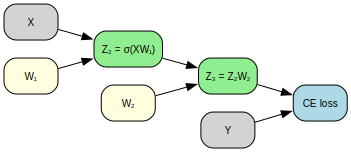

In [4]:
from graphviz import Digraph

dot = Digraph(format="png")
dot.attr(rankdir="LR")
dot.node_attr.update(shape="box", style="rounded,filled", fontsize="10", fontname="Helvetica")
dot.node("X", "X", fillcolor="lightgray")
dot.node("W1", "W₁", fillcolor="lightyellow")
dot.node("Z2", "Z₂ = σ(XW₁)", fillcolor="lightgreen")
dot.node("W2", "W₂", fillcolor="lightyellow")
dot.node("Z3", "Z₃ = Z₂W₂", fillcolor="lightgreen")
dot.node("loss", "CE loss", fillcolor="lightblue")
dot.node("Y", "Y", fillcolor="lightgrey")

dot.edges([("X", "Z2"), ("W1", "Z2"), ("Z2", "Z3"), ("W2", "Z3"), ("Z3", "loss"), ("Y", "loss")])
dot

### Gradients of a 2-layer NN

Let us work through a softmax regression with a two-layer neural network. Here we want to find $\nabla_{\mathbf{W}_i} \mathcal{L}_\text{CE}(h_\Theta(\mathbf{X}), \mathbf{y})$ for $i = 1, 2.$ Let's write this as $\mathbf{Z}_2 = \sigma(\mathbf{X} \mathbf{W}_1)$ and $\mathbf{Z}_3 = \mathbf{Z_2}\mathbf{W}_2.$ From the previous lecture:

$$
\boxed{
\frac{\partial \mathcal{L}_\text{CE}}{\partial \mathbf{W}_2} = 
\frac{\partial \mathcal{L}_\text{CE}}{\partial \mathbf{Z}_3}
\frac{\partial \mathbf{Z}_3}{\partial \mathbf{W}_2}
= \frac{1}{B}\mathbf{Z}_2^\top (\mathbf{P} - \mathbf{E}_\mathbf{y}).
}
$$

**Q.** Shapes. LHS has $(n_2, K)$, while $(n_2, B) \times (B, K)$ on the RHS. OK. In the above equation, we branched towards the weight. But two tensors point towards $\mathbf{Z}_3$, i.e. we now move down towards $\mathbf{Z}_2$ and connect this to $\mathbf{W}_1$ via chain rule: 

$$
\begin{aligned}
\frac{\partial \mathcal{L}_\text{CE}}{\partial \mathbf{W}_1} 
&= 
\frac{\partial \mathcal{L}_\text{CE}}{\partial \mathbf{Z}_3}
\frac{\partial \mathbf{Z}_3}{\partial \mathbf{Z}_2}
\frac{\partial \mathbf{Z}_2}{\partial \mathbf{W}_1}.
\end{aligned}
$$

First, we calculate the first two terms. The middle term is obtained by considering a single instance: ${\partial z_3^{j}}/{\partial z_2^{i}} = w^{ij}_2.$ Thus,

$$
\boxed{
\begin{aligned}
\frac{\partial \mathcal{L}_\text{CE}}{\partial \mathbf{Z}_2} =
\frac{\partial \mathcal{L}_\text{CE}}{\partial \mathbf{Z}_3}
\frac{\partial \mathbf{Z}_3}{\partial \mathbf{Z}_2} = 
\frac{1}{B}
(\mathbf{P} - \mathbf{E}_\mathbf{y})
\mathbf{W}_2^\top.
\end{aligned}
}
$$ 

This has shape $(B, K) \times (K, n_2) = (B, n_2)$ which looks correct. 

Finally, we calculate the last term. Here we are taking the derivative of $n_2$ functions with respect to the weight of shape $(d, n_2).$ Let $\mathbf{y} = \mathbf{W}_1^\top \mathbf{x}$, then 

$$
\begin{aligned}
\frac{\partial {z}_2^j}{\partial w_1^{ik}} 
&= \sum_l 
\frac{\partial z_2^j}{\partial y^l}
\frac{\partial y^l}{\partial w_1^{ik}}  \\
&= \sum_l \delta^{jl} \sigma^\prime(y^j) \, x^i \delta^{lk} = \delta^{jk} \sigma^\prime(y^j) \, x^i. 
\end{aligned}
$$

Here $\delta = $ [Kronecker delta](https://en.wikipedia.org/wiki/Kronecker_delta). The two Kronecker delta "contracted" into one. We can actually just start with $k=j$ but I wanted to show some tensor calculus.
The effect of $\delta^{jk}$ is that $\sigma^\prime(y^j)$ essentially multiplies element-wise to the incoming gradient. Moreover, we aggregate the contribution of the batch instances by multiplying $\mathbf{X}^\top.$ Thus, in batch form:

$$
\boxed{
\frac{\partial \mathcal{L}_\text{CE}}{\partial \mathbf{W}_1}  = 
\frac{1}{B} \mathbf{X}^\top \Big( [(\mathbf{P} - \mathbf{E}_\mathbf{y})
\mathbf{W}_2^\top ] \odot \sigma^\prime(\mathbf{X} \mathbf{W}_1) \Big)
}
$$

### Graph visualization

Backward dependence can be inspected using the `torchviz` library. The graph shows the tensors being stored (🟧) during forward pass to compute the gradients. The weights (🟦) are instances of **leaf tensors**, i.e. the outermost nodes with no parent nodes. Hence, backward iteration stops at the leaf nodes.

It follows that calculating gradients require:
- **twice** the memory of forward pass due to **caching**
- roughly the **same** time complexity $\mathcal{O}(S)$ where $S$ is the network size. 

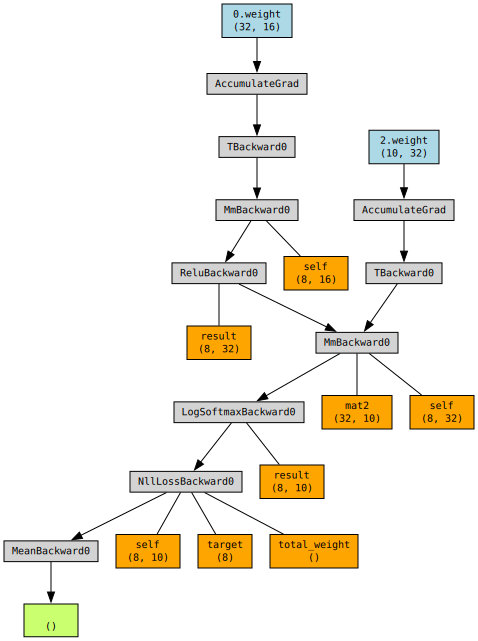

In [5]:
from torchviz import make_dot
import torch
import torch.nn as nn
import torch.nn.functional as F

model = nn.Sequential(
    nn.Linear(16, 32, bias=False),
    nn.ReLU(),
    nn.Linear(32, 10, bias=False)
)

B = 8
x = torch.randn(B, 16)
z = model(x)
y = torch.randint(0, 10, size=(B,))
loss = F.cross_entropy(z, y)

make_dot(loss.mean(), params=dict(model.named_parameters()), show_saved=True)

### General formula for $L$-layers

Is there a method to this madness? Consider our fully-connected network $\mathbf{Z}_{i+1} = \sigma_i (\mathbf{Z}_i \mathbf{W}_i)$ for $i = 1, \ldots, L.$ Observe that we can traverse along the $\mathbf{Z}_i$'s which can be thought of as the trunk of the tree, while the gradient for the leaf tensors (i.e. the weights) can be calculated using the incoming gradients $\partial{\mathcal{L}}/\partial{\mathbf{Z}_{i+1}}$ along the main trunk.

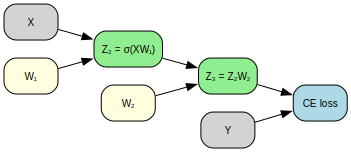

In [6]:
dot  # showing again

Define $\mathbf{G}_{i + 1} \coloneqq \partial{\mathcal{L}}/\partial{\mathbf{Z}_{i+1}}$ with shape $(B, n_{i + 1}).$ First, let's calculate $\mathbf{G}_i$:

$$
\boxed{
\begin{aligned}
\mathbf{G}_{L + 1} &= \frac{1}{B}(\mathbf{P} - \mathbf{E}_\mathbf{y}) \quad \quad \;\text{(cross-entropy)} \\
\mathbf{G}_i &= \mathbf{G}_{i + 1} \frac{\partial \mathbf{Z}_{i + 1}}{\partial \mathbf{Z}_{i}} = [\mathbf{G}_{i + 1} \odot \sigma_i^\prime(\mathbf{Z}_i \mathbf{W}_i)] \mathbf{W}_i^\top
\end{aligned}
}
$$

In general, there's an activation $\sigma_i$ in between the tensors which we backpropagate across. The shape checks out: $(B, n_{i + 1}) \times (n_{i+1}, n_i) = (B, n_{i}).$ This has the form of `loss_grad x local_grad` where the loss gradient $\mathbf{G}_{i+1}$ from the next layer is, in a sense, "global" in contrast.

Finally, to compute the weight gradients:

$$
\boxed{
\frac{\partial \mathcal{L}}{\partial \mathbf{W}_{i}} 
= \mathbf{G}_{i + 1} 
\frac{\partial \mathbf{Z}_{i + 1}}{\partial \mathbf{W}_{i}}
= \mathbf{Z}_i^\top[\mathbf{G}_{i + 1} \odot \sigma_i^\prime(\mathbf{Z}_i \mathbf{W}_i)]
}
$$

This looks very compact. You can verify that the shapes are correct and that the above derivation for two-layer networks is consistent with the current formulas with $\sigma_2 = \text{Id}$. 

**Remark.** Let $\mathbf{Z}_{i+1} = f(\mathbf{Z}_i; \mathbf{W}_i)$ be a custom layer. From the above equations, it sufficies to *define* the local gradients $\partial f / \partial \mathbf{Z}_{i}$ and $\partial f / \partial \mathbf{W}_{i}.$ This modularity allows neural network layers to be composed arbitrarily, and new layers / tensor operations to be integrated into the library.

$\blacksquare$